# Preprocessing & Merging Series GSE161277
Link: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE161277

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc
import scipy.io as sio
import anndata as ad

In [4]:
# dir contains the .gz files
dirPath = "/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/"
# mtx_files = list(Path(dirPath).glob('*.mtx.gz'))

In [5]:
# reading all patient files (~3min)

carcinoma0 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904234_Patient0_carcinoma_")
adenoma1 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904235_Patient1_adenoma_")
carcinoma1 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904236_Patient1_carcinoma_")
normal1 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904237_Patient1_normal_")
adenoma2 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904238_Patient2_adenoma_")
carcinoma2 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904239_Patient2_carcinoma_")
normal2 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904240_Patient2_normal_")
para2 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904241_Patient2_para-cancer_")
adenomaT1P3 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904242_Patient3_adenoma_1_")
adenomaT2P3 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904243_Patient3_adenoma_2_")
blood3 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904244_Patient3_blood_")
carcinoma3 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904245_Patient3_carcinoma_")
normal3 = sc.read_10x_mtx("/home/data/PanCanSC/CRC/GEO/GSE161277/GSE161277_RAW/", prefix="GSM4904246_Patient3_normal_")

In [6]:
# create empty anndata obj
adata = sc.AnnData()

# Patient 1(p1):

In [8]:
p1 = ad.concat([adenoma1, carcinoma1, normal1], axis=0)
p1.obs_names_make_unique

/home/wad18/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 11848 × 33538>

In [36]:
p1.var

,n_cells,highly_variable,means,dispersions,dispersions_norm,mean,std
AL627309.1,35,False,0.002479,0.555477,-0.529233,-1.774258e-02,0.486914
AL627309.3,4,False,0.000115,-0.853853,-2.619729,-1.323068e-02,0.188996
AL669831.5,283,False,0.030382,1.140921,0.339172,-8.066572e-03,0.893687
LINC00115,234,False,0.021289,1.066596,0.228924,-1.306083e-02,0.810955
FAM41C,160,False,0.015200,1.057416,0.215306,-1.704432e-02,0.727298
...,...,...,...,...,...,...,...
AL592183.1,350,False,0.042384,1.162117,0.370613,-3.201362e-03,0.959700
AC007325.4,244,False,0.018133,0.696156,-0.320559,-1.390252e-02,0.806718
AL354822.1,214,False,0.025104,1.157768,0.364161,-1.054783e-02,0.858358
AC004556.1,3404,False,0.284512,0.593942,-0.472177,2.722253e-08,1.000000


Plot illustrating genes that yield the highest fraction of the counts in each single cell, across all cells.

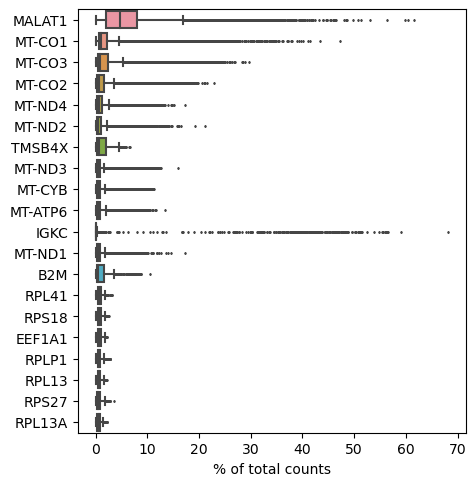

In [9]:
sc.pl.highest_expr_genes(p1, n_top=20, )

Filtering:

In [10]:
# Preprocess the merged AnnData object
sc.pp.filter_cells(p1, min_genes=200)
sc.pp.filter_genes(p1, min_cells=3)

p1.obs_names_make_unique

/home/wad18/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/wad18/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 11233 × 21165
    obs: 'n_genes'
    var: 'n_cells'>

Slicing:

In [11]:
# scaling up to 10000
sc.pp.normalize_total(p1, target_sum=1e4)

# logarithmize the data
sc.pp.log1p(p1)

Identify highly variable genes:

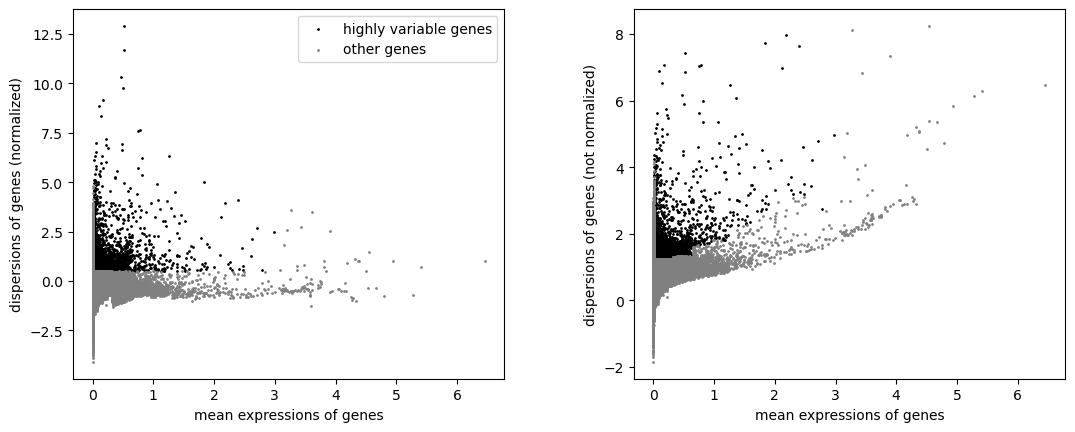

In [12]:
sc.pp.highly_variable_genes(p1, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(p1)
# p1 = p1[:, p1.var.highly_variable]
# ^^ Filters the columns (genes) of p1 by selecting 
# only the columns where the corresponding element in 
# p2.var.highly_variable is True

Plotting:

/home/wad18/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


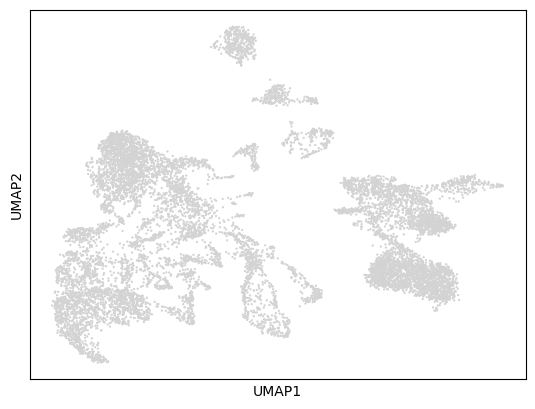

In [33]:
#sc.pp.scale(p1, max_value=10)
sc.pp.neighbors(p1)
sc.tl.umap(p1)
sc.pl.umap(p1)

# Patient 2(p2):

In [18]:
p2 = ad.concat([adenoma2, carcinoma2, normal2], axis=0)
p2.obs_names_make_unique

/home/wad18/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 19384 × 33538>

Plot illustrating genes that yield the highest fraction of the counts in each single cell, across all cells.

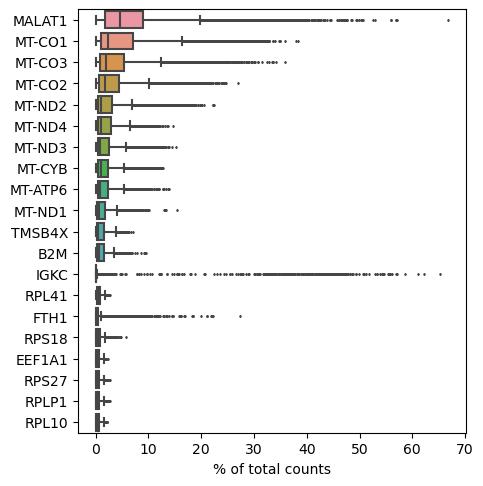

In [19]:
sc.pl.highest_expr_genes(p2, n_top=20, )

Filtering:

In [20]:
# Preprocess the merged AnnData object
sc.pp.filter_cells(p2, min_genes=200)
sc.pp.filter_genes(p2, min_cells=3)

p2.obs_names_make_unique

/home/wad18/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/wad18/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 16981 × 21901
    obs: 'n_genes'
    var: 'n_cells'>

Slicing:

In [22]:
# scaling up to 10000
sc.pp.normalize_total(p2, target_sum=1e4)

# logarithmize the data
sc.pp.log1p(p2)

Identify highly variable genes:

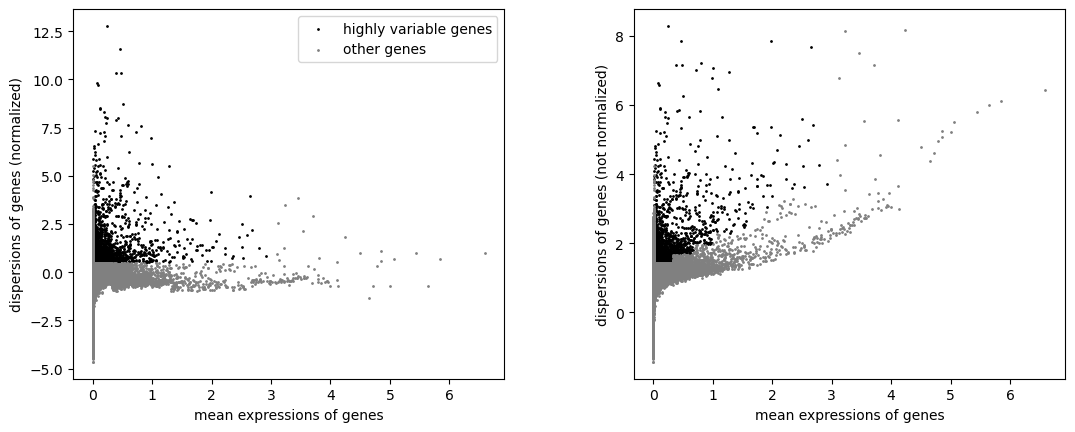

In [24]:
sc.pp.highly_variable_genes(p2, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(p2)
p2 = p2[:, p2.var.highly_variable]

/home/wad18/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


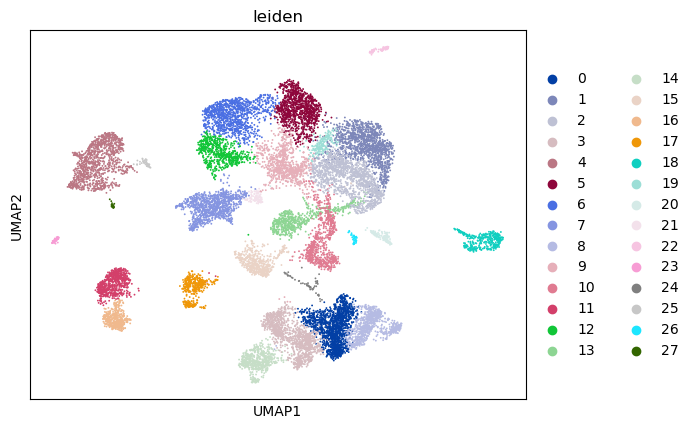

<bound method AnnData.obs_names_make_unique of AnnData object with n_obs × n_vars = 16981 × 2938
    obs: 'n_genes', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'>

In [26]:
# Compute UMAP
sc.pp.neighbors(p2)
sc.tl.umap(p2)

# Perform clustering
sc.tl.leiden(p2)

# Plot UMAP and cluster assignments
sc.pl.umap(p2, color=["leiden"])
p2.obs_names_make_unique